In [17]:
#pip install tqdm

In [18]:
# pip install tqdm

import pandas as pd
import numpy as np
import json
from tqdm import tqdm

In [19]:
# Load the main datasets
order_data = pd.read_csv('order_data.csv')  
customer_data = pd.read_csv('customer_data.csv')  
store_data = pd.read_csv('store_data.csv')  
test_data = pd.read_csv('test_data_question.csv')

In [20]:
# Display basic info about each dataset
print("Order Data Shape:", order_data.shape)
print("Customer Data Shape:", customer_data.shape)
print("Store Data Shape:", store_data.shape)
print("Test Data Shape:", test_data.shape)

Order Data Shape: (1414410, 8)
Customer Data Shape: (563346, 2)
Store Data Shape: (38, 4)
Test Data Shape: (1000, 10)


In [21]:
# Display heads
order_data.head()


,CUSTOMER_ID,STORE_NUMBER,ORDER_CREATED_DATE,ORDER_ID,ORDERS,ORDER_CHANNEL_NAME,ORDER_SUBCHANNEL_NAME,ORDER_OCCASION_NAME
0,362204699,2156,2024-07-24,7247194287,"{""orders"": [{""item_details"": [{""item_name"": ""O...",Digital,WWT,ToGo
1,269612955,1419,2025-02-15,791214421,"{""orders"": [{""item_details"": [{""item_name"": ""R...",Digital,WWT,ToGo
2,585330633,2249,2025-02-15,7575285208,"{""orders"": [{""item_details"": [{""item_name"": ""2...",Digital,WWT,ToGo
3,950661333,2513,2024-03-29,4253875716,"{""orders"": [{""item_details"": [{""item_name"": ""O...",Digital,WWT,ToGo
4,434985772,1754,2024-04-08,7150407872,"{""orders"": [{""item_details"": [{""item_name"": ""O...",Digital,WWT,ToGo


In [22]:
customer_data.head()

,CUSTOMER_ID,CUSTOMER_TYPE
0,362204699,Registered
1,269612955,Registered
2,585330633,Guest
3,950661333,Registered
4,434985772,Guest


In [23]:
store_data.head()

,STORE_NUMBER,CITY,STATE,POSTAL_CODE
0,2156,GRAPEVINE,TX,76051
1,1419,HUNTERSVILLE,NC,28078
2,2249,NaN,NaN,32792
3,2513,LAS VEGAS,NV,89129
4,1754,ARDMORE,OK,73401


In [24]:
test_data.head()

,CUSTOMER_ID,STORE_NUMBER,ORDER_ID,ORDER_CHANNEL_NAME,ORDER_SUBCHANNEL_NAME,ORDER_OCCASION_NAME,CUSTOMER_TYPE,item1,item2,item3
0,997177535,4915,9351345556,Digital,WWT,ToGo,Guest,Chicken Sub Combo,Ranch Dip - Regular,10 pc Spicy Wings Combo
1,345593831,949,3595377080,Digital,WWT,ToGo,Registered,Regular Buffalo Fries,10 pc Spicy Wings,3 pc Crispy Strips Combo
2,160955031,2249,4071757785,Digital,WWT,ToGo,Guest,Large Buffalo Fries,10 pc Spicy Wings,Ranch Dip - Regular
3,890671991,4154,3931766769,Digital,WWT,ToGo,Guest,6 pc Grilled Wings Combo,20 pc Grilled Wings,Fried Corn - Large
4,73989021,4094,3739700809,Digital,WWT,ToGo,Registered,Regular Buffalo Fries,20 pc Grilled Wings,Ranch Dip - Large


In [25]:
# Display info
print(order_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414410 entries, 0 to 1414409
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   CUSTOMER_ID            1414410 non-null  int64 
 1   STORE_NUMBER           1414410 non-null  int64 
 2   ORDER_CREATED_DATE     1414410 non-null  object
 3   ORDER_ID               1414410 non-null  int64 
 4   ORDERS                 1414410 non-null  object
 5   ORDER_CHANNEL_NAME     1414410 non-null  object
 6   ORDER_SUBCHANNEL_NAME  1414410 non-null  object
 7   ORDER_OCCASION_NAME    1414410 non-null  object
dtypes: int64(3), object(5)
memory usage: 86.3+ MB
None


In [26]:
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563346 entries, 0 to 563345
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CUSTOMER_ID    563346 non-null  int64 
 1   CUSTOMER_TYPE  563319 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.6+ MB
None


In [27]:
print(store_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STORE_NUMBER  38 non-null     int64 
 1   CITY          25 non-null     object
 2   STATE         24 non-null     object
 3   POSTAL_CODE   36 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.3+ KB
None


In [28]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CUSTOMER_ID            1000 non-null   int64 
 1   STORE_NUMBER           1000 non-null   int64 
 2   ORDER_ID               1000 non-null   int64 
 3   ORDER_CHANNEL_NAME     1000 non-null   object
 4   ORDER_SUBCHANNEL_NAME  1000 non-null   object
 5   ORDER_OCCASION_NAME    1000 non-null   object
 6   CUSTOMER_TYPE          1000 non-null   object
 7   item1                  1000 non-null   object
 8   item2                  1000 non-null   object
 9   item3                  1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB
None


In [29]:
# Display missing values
print("🧩 Missing Values:")
print(order_data.isnull().sum())

🧩 Missing Values:
CUSTOMER_ID              0
STORE_NUMBER             0
ORDER_CREATED_DATE       0
ORDER_ID                 0
ORDERS                   0
ORDER_CHANNEL_NAME       0
ORDER_SUBCHANNEL_NAME    0
ORDER_OCCASION_NAME      0
dtype: int64


In [30]:
print("🧩 Missing Values:")
print(customer_data.isnull().sum())

🧩 Missing Values:
CUSTOMER_ID       0
CUSTOMER_TYPE    27
dtype: int64


In [31]:
print("🧩 Missing Values:")
print(store_data.isnull().sum())

🧩 Missing Values:
STORE_NUMBER     0
CITY            13
STATE           14
POSTAL_CODE      2
dtype: int64


In [32]:
import textwrap

# DataFrames to analyze
datasets = {
    "order_data": order_data,
    "customer_data": customer_data,
    "store_data": store_data,
    "test_data": test_data
}

# Threshold for displaying unique values
unique_display_threshold = 36

# Column widths
col_widths = {
    "col_name": 30,
    "missing": 15,
    "unique": 15,
    "uniques_str": 60  # wrap width
}

# Function to print one row and wrap unique values nicely
def print_row(col, missing, unique_count, unique_str):
    col_fmt = f"{col:<{col_widths['col_name']}}"
    missing_fmt = f"{missing:<{col_widths['missing']}}"
    unique_fmt = f"{unique_count:<{col_widths['unique']}}"
    
    # Wrap the unique values to the allowed width
    wrapped_uniques = textwrap.wrap(unique_str, width=col_widths["uniques_str"])
    
    # First line: main row
    print(f"{col_fmt}{missing_fmt}{unique_fmt}{wrapped_uniques[0] if wrapped_uniques else ''}")
    
    # Additional lines: indented under the 4th column
    for line in wrapped_uniques[1:]:
        print(" " * (col_widths['col_name'] + col_widths['missing'] + col_widths['unique']) + line)

# Print per table
for name, df in datasets.items():
    print(f"\n==== {name} ====")
    header = f"{'Column Name':<{col_widths['col_name']}}{'Missing Values':<{col_widths['missing']}}{'Unique Count':<{col_widths['unique']}}Unique Values (if <39)"
    print(header)
    print("-" * len(header))

    for col in df.columns:
        missing = df[col].isnull().sum()
        unique_count = df[col].nunique(dropna=True)

        if unique_count < unique_display_threshold:
            uniques = df[col].dropna().unique()
            unique_str = ", ".join(map(str, uniques))
        else:
            unique_str = ""

        print_row(col, missing, unique_count, unique_str)


==== order_data ====
Column Name                   Missing Values Unique Count   Unique Values (if <39)
----------------------------------------------------------------------------------
CUSTOMER_ID                   0              563346         
STORE_NUMBER                  0              38             
ORDER_CREATED_DATE            0              446            
ORDER_ID                      0              1414410        
ORDERS                        0              735527         
ORDER_CHANNEL_NAME            0              1              Digital
ORDER_SUBCHANNEL_NAME         0              2              WWT, Grub Hub Marketplace
ORDER_OCCASION_NAME           0              2              ToGo, Delivery

==== customer_data ====
Column Name                   Missing Values Unique Count   Unique Values (if <39)
----------------------------------------------------------------------------------
CUSTOMER_ID                   0              563346         
CUSTOMER_TYPE             

In [33]:
# Detect JSON columns
def detect_json_columns(df, df_name):
    json_cols = []
    for col in df.columns:
        sample = df[col].dropna().astype(str).iloc[0]  # take first non-null as string
        try:
            parsed = json.loads(sample)
            if isinstance(parsed, (dict, list)):
                json_cols.append(col)
        except:
            continue
    print(f"JSON-like columns in {df_name}: {json_cols if json_cols else 'None'}")

detect_json_columns(order_data, "order_data")
detect_json_columns(customer_data, "customer_data")
detect_json_columns(store_data, "store_data")
detect_json_columns(test_data, "test_data")

JSON-like columns in order_data: ['ORDERS']
JSON-like columns in customer_data: None
JSON-like columns in store_data: None
JSON-like columns in test_data: None


In [34]:
# 🔍 Extract and print all unique item_name values before generating wide_df
unique_item_names = set()

for idx, row in tqdm(order_data.iterrows(), total=len(order_data), desc='Extracting unique item_name values'):
    try:
        orders_field = row['ORDERS']
        if isinstance(orders_field, str):
            order_json = json.loads(orders_field)
        elif isinstance(orders_field, dict):
            order_json = orders_field
        else:
            continue

        item_details = order_json['orders'][0]['item_details']

        for item in item_details:
            item_name = item.get('item_name')
            if item_name:
                unique_item_names.add(item_name.strip())

    except Exception as e:
        print(f"Error in row {idx}: {e}")
        continue

# Print all unique item names
print(f"\n🔍 Found {len(unique_item_names)} unique item_name values:")
for name in sorted(unique_item_names):
    print(f"- {name}")

Extracting unique item_name values: 100%|██████████| 1414410/1414410 [01:53<00:00, 12513.83it/s]


🔍 Found 145 unique item_name values:
- $19.99 Crispy Feast
- 10 pc Grilled Wings
- 10 pc Grilled Wings Combo
- 10 pc Mixed Wings
- 10 pc Mixed Wings Combo
- 10 pc Spicy Wings
- 10 pc Spicy Wings Combo
- 100 pc Family Grilled Wings
- 100 pc Family Mixed Wings
- 100 pc Family Spicy Wings
- 100 pc Grilled Wings
- 100 pc Mixed Wings
- 100 pc Spicy Wings
- 15 pc Crispy Strips
- 15 pc Grilled Wings
- 15 pc Grilled Wings Combo
- 15 pc Mixed Wings
- 15 pc Mixed Wings Combo
- 15 pc Spicy Wings
- 15 pc Spicy Wings Combo
- 2 pc Crispy Strips
- 20 Oz Soda
- 20 pc Crispy Strips
- 20 pc Grilled Wings
- 20 pc Mixed Wings
- 20 pc Spicy Wings
- 20pc Spicy Feast Deal
- 24 pc Family Grilled Wings
- 24 pc Family Mixed Wings
- 24 pc Family Spicy Wings
- 25 pc Game Day Pack
- 25 pc Spicy Wings
- 3 Strips Lunch
- 3 pc Crispy Strips Combo
- 3 pc Grilled Wings
- 30 pc Crispy Strips
- 30 pc Family Grilled Wings
- 30 pc Family Mixed Wings
- 30 pc Family Spicy Wings
- 30 pc Grilled Wings
- 30 pc Mixed Wings
- 30

In [35]:
#checking if $19.99 Crispy Feast is an incorrect data where the prices column has come into the item_name column.

In [36]:
feast_prices = []

for idx, row in tqdm(order_data.iterrows(), total=len(order_data), desc='Checking item_price for "$19.99 Crispy Feast"'):
    try:
        orders_field = row['ORDERS']
        if isinstance(orders_field, str):
            order_json = json.loads(orders_field)
        elif isinstance(orders_field, dict):
            order_json = orders_field
        else:
            continue

        item_details = order_json['orders'][0]['item_details']

        for item in item_details:
            if item.get('item_name', '').strip() == "$19.99 Crispy Feast":
                feast_prices.append(float(item.get('item_price', 0)))

    except Exception as e:
        print(f"Error in row {idx}: {e}")
        continue

# Display results
print(f"\n🔍 Found {len(feast_prices)} entries for '$19.99 Crispy Feast'")
print("Unique item_price values for it:")
print(sorted(set(feast_prices)))

Checking item_price for "$19.99 Crispy Feast": 100%|██████████| 1414410/1414410 [01:50<00:00, 12765.78it/s]


🔍 Found 57 entries for '$19.99 Crispy Feast'
Unique item_price values for it:
[19.99, 39.98]


In [58]:
from tqdm import tqdm
import json
import re
import pandas as pd

excluded_names = {
    'Delivery Fee',
    'Order Blankline 1',
    'Order Blankline 2',
    'Order Memo ASAP',
    'Order Memo Future',
    'Order Memo Item',
    'Order Memo Not Paid',
    'Order Memo Paid',
    'Plastic Fork',
    'Plastic Knife',
    'Plastic Straw',
    'Plastic Utensils',
    'Unavailable Item'
}

def normalize_item_name(name):
    if not isinstance(name, str):
        return name

    # Remove price like $19.99
    name = re.sub(r'\$\d+(\.\d+)?', '', name)

    # Remove quantity mentions like '10 pc', '15 pc', '3pc', '32 Oz', '24 pc', etc.
    name = re.sub(r'\b\d+\s*pc\b', '', name, flags=re.IGNORECASE)
    name = re.sub(r'\b\d+pc\b', '', name, flags=re.IGNORECASE)
    name = re.sub(r'\b\d+\s*oz\b', '', name, flags=re.IGNORECASE)

    # Remove size and packaging words
    remove_words = [
        r'\bcombo\b',
        r'\bfamily\b',
        r'\bsmall\b',
        r'\blarge\b',
        r'\bregular\b',
        r'\bmeal for \d+\b',
        r'\bdeal\b',
        r'\bpack\b',
        r'\bbundle\b',
        r'\badd \d+\b',
        r'\badd\b',
        r'\blunch\b',
        r'\bbox\b',
        r'\bpc\b',
        r'\bcan\b',            # remove 'can' anywhere
        r'\b3 \b',
        r'\bmedium\b',
        r'\bbottled\b',        # remove 'bottled' anywhere
    ]
    for word in remove_words:
        name = re.sub(word, '', name, flags=re.IGNORECASE)

    # Remove 'cream' only if followed by 'soda' (case insensitive)
    name = re.sub(r'\bcream(?=\s+soda\b)', '', name, flags=re.IGNORECASE)

    # Remove hyphens/dashes (regular or en-dash or em-dash) before or after these phrases:
    # Examples: 'Blue Cheese Dip - Large' -> 'Blue Cheese Dip Large' (then size removed later)
    hyphen_phrases = [
        'Voodoo Fries',
        'Blue Cheese Dip',
        'Cheese Dip',
        'Cheese Fries'
    ]
    # Replace patterns like "Phrase -", "Phrase –", "Phrase —" with just "Phrase"
    for phrase in hyphen_phrases:
        # Remove hyphen or dash at end of phrase followed by space or end
        pattern = rf'({phrase})\s*[-–—]\s*'
        name = re.sub(pattern, r'\1 ', name, flags=re.IGNORECASE)

    # Remove trailing hyphen/dash at end of string, e.g. "Voodoo Fries -"
    name = re.sub(r'[-–—]\s*$', '', name)

    # Clean multiple spaces to single space and strip
    name = re.sub(r'\s+', ' ', name).strip()

    # Title case
    name = name.title()

    return name


def parse_orders_to_columns(df):
    rows = []

    for idx, row in tqdm(df.iterrows(), total=len(df), desc='Parsing orders to columns'):
        try:
            orders_field = row['ORDERS']
            if isinstance(orders_field, str):
                order_json = json.loads(orders_field)
            elif isinstance(orders_field, dict):
                order_json = orders_field
            else:
                raise ValueError(f"Unexpected data type for ORDERS in row {idx}: {type(orders_field)}")

            item_details = order_json['orders'][0]['item_details']

            base_data = {
                'CUSTOMER_ID': row['CUSTOMER_ID'],
                'STORE_NUMBER': row['STORE_NUMBER'],
                'ORDER_CREATED_DATE': row['ORDER_CREATED_DATE'],
                'ORDER_ID': row['ORDER_ID'],
                'ORDER_CHANNEL_NAME': row['ORDER_CHANNEL_NAME'],
                'ORDER_SUBCHANNEL_NAME': row['ORDER_SUBCHANNEL_NAME'],
                'ORDER_OCCASION_NAME': row['ORDER_OCCASION_NAME']
            }

            item_count = 0
            for item in item_details:
                raw_name = item.get('item_name', '').strip()
                if raw_name in excluded_names:
                    continue

                normalized_name = normalize_item_name(raw_name)
                if normalized_name == '':
                    continue

                item_count += 1
                base_data[f'item_name_{item_count}'] = normalized_name
                base_data[f'item_price_{item_count}'] = item['item_price']
                base_data[f'item_quantity_{item_count}'] = item['item_quantity']

            rows.append(base_data)

        except Exception as e:
            print(f"Error parsing row {idx}: {e}")
            continue

    return pd.DataFrame(rows)

In [59]:
metric2_df = parse_orders_to_columns(order_data)

Parsing orders to columns: 100%|██████████| 1414410/1414410 [02:57<00:00, 7974.20it/s]


In [60]:
display(metric2_df.head())

,CUSTOMER_ID,STORE_NUMBER,ORDER_CREATED_DATE,ORDER_ID,ORDER_CHANNEL_NAME,ORDER_SUBCHANNEL_NAME,ORDER_OCCASION_NAME,item_name_1,item_price_1,item_quantity_1,...,item_quantity_12,item_name_13,item_price_13,item_quantity_13,item_name_14,item_price_14,item_quantity_14,item_name_15,item_price_15,item_quantity_15
0,362204699,2156,2024-07-24,7247194287,Digital,WWT,ToGo,Grilled Wings,15.29,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,269612955,1419,2025-02-15,791214421,Digital,WWT,ToGo,Ranch Dip,1.59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,585330633,2249,2025-02-15,7575285208,Digital,WWT,ToGo,Spicy Feast,16.99,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,950661333,2513,2024-03-29,4253875716,Digital,WWT,ToGo,Grilled Wings,26.59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,434985772,1754,2024-04-08,7150407872,Digital,WWT,ToGo,Grilled Wings,11.29,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Step 1: Identify all item_name_* columns
item_name_cols = [col for col in metric2_df.columns if col.startswith('item_name_')]

# Step 2: Extract all values from those columns
all_item_names = pd.unique(metric2_df[item_name_cols].values.ravel())

# Step 3: Remove NaN and sort
unique_item_names = sorted([name for name in all_item_names if pd.notna(name)])

# Step 4: Print
print(f"🔍 Found {len(unique_item_names)} unique item names across item_name_* columns:")
for name in unique_item_names:
    print(f"- {name}")

🔍 Found 47 unique item names across item_name_* columns:
- Beverage
- Blue Cheese Dip
- Buffalo Fries
- Carrot Sticks
- Celery Sticks
- Cheese Dip
- Cheese Fries
- Chicken Sub
- Crispy Feast
- Crispy Strips
- Dipping Sauce
- Domestic Draft Lager
- Domestic Lager
- Domestic Lager Special
- Drink Upgrade
- Extra Sauce
- Flavor Platter
- Flavor Platter Grilled
- Fried Corn
- Fruit Punch
- Game Day
- Grilled
- Grilled Wings
- Honey Mustard Dip
- Hot Honey Strips
- Ketchup
- Legendary Feast
- Lemonade
- Mixed Wings
- Premium Lager
- Ranch Dip
- Root Beer
- Seasoning
- Soda
- Sparkling Water
- Spicy Feast
- Spicy Wings
- Sports Drink
- Strips
- Sub
- Triple Chocolate Cake
- Triple Feast
- Veggie Sticks
- Veggie Sticks Spicy
- Voodoo Fries
- Water
- Wings


In [62]:
def merge_duplicate_items_per_order(df):
    item_name_cols = sorted([col for col in df.columns if col.startswith('item_name_')])
    item_price_cols = sorted([col for col in df.columns if col.startswith('item_price_')])
    item_quantity_cols = sorted([col for col in df.columns if col.startswith('item_quantity_')])
    
    assert len(item_name_cols) == len(item_price_cols) == len(item_quantity_cols), "Mismatch in item columns count"
    
    merged_rows = []
    
    for idx, row in tqdm(df.iterrows(), total=len(df), desc='Merging duplicate items per order'):
        # Dictionary to accumulate items
        items_accum = {}
        
        for n in range(len(item_name_cols)):
            name = row[item_name_cols[n]]
            price = row[item_price_cols[n]]
            quantity = row[item_quantity_cols[n]]
            
            if pd.isna(name) or name == '':
                continue
            
            if name not in items_accum:
                items_accum[name] = {'price': 0.0, 'quantity': 0}
            
            # Sum price and quantity
            # Note: Depending on your price data, price could be per unit or total for that item line
            # Adjust accordingly. Here I assume price is total for that item (quantity * unit price)
            
            try:
                items_accum[name]['price'] += float(price)
            except:
                pass
            
            try:
                items_accum[name]['quantity'] += int(quantity)
            except:
                pass
        
        # Build new row data with merged items
        base_cols = ['CUSTOMER_ID', 'STORE_NUMBER', 'ORDER_CREATED_DATE', 'ORDER_ID',
                     'ORDER_CHANNEL_NAME', 'ORDER_SUBCHANNEL_NAME', 'ORDER_OCCASION_NAME']
        
        new_row = {col: row[col] for col in base_cols if col in row}
        
        # Flatten merged items back into columns item_name_i, item_price_i, item_quantity_i
        for i, (iname, ivals) in enumerate(items_accum.items(), 1):
            new_row[f'item_name_{i}'] = iname
            new_row[f'item_price_{i}'] = ivals['price']
            new_row[f'item_quantity_{i}'] = ivals['quantity']
        
        merged_rows.append(new_row)
    
    merged_df = pd.DataFrame(merged_rows)
    
    # Optional: fill NaN with blanks or zeros for consistency
    merged_df.fillna({'item_price_1': 0, 'item_quantity_1': 0}, inplace=True)
    
    return merged_df

In [63]:
# Step 1: Identify all item_name_* columns
item_name_cols = [col for col in metric2_df.columns if col.startswith('item_name_')]

# Step 2: Extract all values from those columns
all_item_names = pd.unique(metric2_df[item_name_cols].values.ravel())

# Step 3: Remove NaN and sort
unique_item_names = sorted([name for name in all_item_names if pd.notna(name)])

# Step 4: Print
print(f"🔍 Found {len(unique_item_names)} unique item names across item_name_* columns:")
for name in unique_item_names:
    print(f"- {name}")

🔍 Found 47 unique item names across item_name_* columns:
- Beverage
- Blue Cheese Dip
- Buffalo Fries
- Carrot Sticks
- Celery Sticks
- Cheese Dip
- Cheese Fries
- Chicken Sub
- Crispy Feast
- Crispy Strips
- Dipping Sauce
- Domestic Draft Lager
- Domestic Lager
- Domestic Lager Special
- Drink Upgrade
- Extra Sauce
- Flavor Platter
- Flavor Platter Grilled
- Fried Corn
- Fruit Punch
- Game Day
- Grilled
- Grilled Wings
- Honey Mustard Dip
- Hot Honey Strips
- Ketchup
- Legendary Feast
- Lemonade
- Mixed Wings
- Premium Lager
- Ranch Dip
- Root Beer
- Seasoning
- Soda
- Sparkling Water
- Spicy Feast
- Spicy Wings
- Sports Drink
- Strips
- Sub
- Triple Chocolate Cake
- Triple Feast
- Veggie Sticks
- Veggie Sticks Spicy
- Voodoo Fries
- Water
- Wings


In [66]:
# Step 1: Identify item quantity and item price columns
item_qty_cols = [col for col in metric2_df.columns if col.startswith('item_quantity_')]
item_price_cols = [col for col in metric2_df.columns if col.startswith('item_price_')]

# Step 2: Total items and total money per order (row)
metric2_df['total_items_in_order'] = metric2_df[item_qty_cols].apply(pd.to_numeric, errors='coerce').sum(axis=1)
metric2_df['total_money_spent'] = metric2_df[item_price_cols].apply(pd.to_numeric, errors='coerce').sum(axis=1)

# Step 3: Aggregate per CUSTOMER_ID
customer_item_stats = metric2_df.groupby('CUSTOMER_ID').agg(
    num_items_ordered=('total_items_in_order', 'sum'),
    total_money_spent=('total_money_spent', 'sum'),
    total_num_orders=('total_items_in_order', 'count')
).reset_index()

# Step 4: Merge with CUSTOMER_TYPE
customer_data_merged = customer_item_stats.merge(
    customer_data[['CUSTOMER_ID', 'CUSTOMER_TYPE']],
    on='CUSTOMER_ID',
    how='left'
)

# Optional: reorder columns
ordered_cols = [
    'CUSTOMER_ID', 'CUSTOMER_TYPE', 'total_num_orders',
    'num_items_ordered', 'total_money_spent'
]
customer_data_merged = customer_data_merged[ordered_cols]

In [67]:
display(customer_data_merged.head())

,CUSTOMER_ID,CUSTOMER_TYPE,total_num_orders,num_items_ordered,total_money_spent
0,1588,Registered,4,6.0,69.84
1,2475,Registered,2,7.0,80.53
2,4769,Guest,1,2.0,57.08
3,5791,Registered,1,1.0,24.99
4,6524,Registered,3,6.0,112.04


In [68]:
# Filter rows where CUSTOMER_TYPE is null (missing)
null_customer_type = customer_data_merged[customer_data_merged['CUSTOMER_TYPE'].isna()]

display(null_customer_type)

,CUSTOMER_ID,CUSTOMER_TYPE,total_num_orders,num_items_ordered,total_money_spent
15722,27866166,NaN,1,1.0,9.99
24087,42901498,NaN,1,2.0,16.48
31006,55242064,NaN,1,4.0,36.76
36160,64361783,NaN,2,2.0,19.28
81078,143933193,NaN,1,3.0,19.97
101766,180748854,NaN,1,1.0,9.99
133024,236397925,NaN,1,1.0,10.19
140473,249644033,NaN,2,8.0,74.42
155201,275993975,NaN,1,1.0,36.29
191049,339524761,NaN,1,4.0,39.76


In [69]:
# Step 0: Add derived columns
customer_data_merged['avg_money_per_order'] = (
    customer_data_merged['total_money_spent'] / customer_data_merged['total_num_orders']
)

customer_data_merged['avg_money_per_item'] = (
    customer_data_merged['total_money_spent'] / customer_data_merged['num_items_ordered']
)

In [70]:
display(customer_data_merged.head())

,CUSTOMER_ID,CUSTOMER_TYPE,total_num_orders,num_items_ordered,total_money_spent,avg_money_per_order,avg_money_per_item
0,1588,Registered,4,6.0,69.84,17.460000,11.640000
1,2475,Registered,2,7.0,80.53,40.265000,11.504286
2,4769,Guest,1,2.0,57.08,57.080000,28.540000
3,5791,Registered,1,1.0,24.99,24.990000,24.990000
4,6524,Registered,3,6.0,112.04,37.346667,18.673333


In [71]:
# Step 1: Filter out rows where CUSTOMER_TYPE is null or 'Deleted Account'
valid_customers = customer_data_merged[
    (customer_data_merged['CUSTOMER_TYPE'].notna()) &
    (customer_data_merged['CUSTOMER_TYPE'].str.strip() != 'Deleted Account')
]

# Step 2: Identify numeric columns including new ones
numeric_cols = [
    'avg_money_per_order',
    'avg_money_per_item'
]

# Step 3: Group by CUSTOMER_TYPE and calculate summary statistics
summary_stats = valid_customers.groupby('CUSTOMER_TYPE')[numeric_cols].agg(['mean'])

# Step 4: Display the result
display(summary_stats)

,avg_money_per_order,avg_money_per_item
,mean,mean
CUSTOMER_TYPE,,
Guest,32.523633,16.869806
Online,38.625000,26.152500
Registered,29.618382,15.194449
eClub,33.044098,17.147293


In [72]:
# Step 1: Identify customers with null CUSTOMER_TYPE
null_customers = customer_data_merged[
    customer_data_merged['CUSTOMER_TYPE'].isna()
][['CUSTOMER_ID', 'avg_money_per_order', 'avg_money_per_item']].copy()

# Step 2: Your fixed centroids
group_centroids = {
    'Guest': [32.52, 16.87],
    'Online': [38.63, 26.15],
    'Registered': [29.62, 15.19],
    'eClub': [33.04, 17.15]
}

# Step 3: Define function to assign closest group based on Euclidean distance
def assign_customer_type(row):
    min_dist = float('inf')
    assigned_type = None
    for group, (order_val, item_val) in group_centroids.items():
        dist = np.linalg.norm([
            row['avg_money_per_order'] - order_val,
            row['avg_money_per_item'] - item_val
        ])
        if dist < min_dist:
            min_dist = dist
            assigned_type = group
    return assigned_type

# Step 4: Apply assignment
null_customers['inferred_customer_type'] = null_customers.apply(assign_customer_type, axis=1)

# Step 5: Merge back to customer_data_merged
customer_data_merged = customer_data_merged.merge(
    null_customers[['CUSTOMER_ID', 'inferred_customer_type']],
    on='CUSTOMER_ID',
    how='left'
)

# Step 6: Fill null CUSTOMER_TYPE only
customer_data_merged['CUSTOMER_TYPE'] = customer_data_merged['CUSTOMER_TYPE'].fillna(
    customer_data_merged['inferred_customer_type']
)



In [73]:
customer_data_merged

,CUSTOMER_ID,CUSTOMER_TYPE,total_num_orders,num_items_ordered,total_money_spent,avg_money_per_order,avg_money_per_item,inferred_customer_type
0,1588,Registered,4,6.0,69.84,17.460000,11.640000,NaN
1,2475,Registered,2,7.0,80.53,40.265000,11.504286,NaN
2,4769,Guest,1,2.0,57.08,57.080000,28.540000,NaN
3,5791,Registered,1,1.0,24.99,24.990000,24.990000,NaN
4,6524,Registered,3,6.0,112.04,37.346667,18.673333,NaN
...,...,...,...,...,...,...,...,...
563341,999978358,Registered,1,2.0,17.08,17.080000,8.540000,NaN
563342,999980801,Guest,1,2.0,17.68,17.680000,8.840000,NaN
563343,999994908,Guest,1,1.0,16.19,16.190000,16.190000,NaN
563344,999996591,Registered,4,10.0,103.10,25.775000,10.310000,NaN


In [74]:
print(customer_data_merged[customer_data_merged['inferred_customer_type'].notna()][
    ['CUSTOMER_ID', 'avg_money_per_order', 'avg_money_per_item', 'CUSTOMER_TYPE', 'inferred_customer_type']
])

        CUSTOMER_ID  avg_money_per_order  avg_money_per_item CUSTOMER_TYPE  \
15722      27866166             9.990000            9.990000    Registered   
24087      42901498            16.480000            8.240000    Registered   
31006      55242064            36.760000            9.190000         Guest   
36160      64361783             9.640000            9.640000    Registered   
81078     143933193            19.970000            6.656667    Registered   
101766    180748854             9.990000            9.990000    Registered   
133024    236397925            10.190000           10.190000    Registered   
140473    249644033            37.210000            9.302500         eClub   
155201    275993975            36.290000           36.290000        Online   
191049    339524761            39.760000            9.940000         eClub   
231921    411458861             9.990000            9.990000    Registered   
253955    450816833            14.380000            7.190000    

In [75]:
# Step 7: Drop helper column
customer_data_merged.drop(columns=['inferred_customer_type'], inplace=True)

In [76]:
# Unique elements
unique_types = customer_data_merged['CUSTOMER_TYPE'].unique()
print("Unique CUSTOMER_TYPE values:")
print(unique_types)

# Count of each type
type_counts = customer_data_merged['CUSTOMER_TYPE'].value_counts()
print("\nCount of each CUSTOMER_TYPE:")
print(type_counts)

Unique CUSTOMER_TYPE values:
['Registered' 'Guest' 'eClub' 'Deleted Account' 'Online']

Count of each CUSTOMER_TYPE:
Registered         406671
Guest              155133
eClub                1188
Deleted Account       348
Online                  6
Name: CUSTOMER_TYPE, dtype: int64


In [77]:
# Original CUSTOMER_TYPE counts from customer_data before any inference
original_type_counts = customer_data['CUSTOMER_TYPE'].value_counts(dropna=False)

print("📊 Original CUSTOMER_TYPE counts (before filling nulls):")
print(original_type_counts)

📊 Original CUSTOMER_TYPE counts (before filling nulls):
Registered         406653
Guest              155132
eClub                1184
Deleted Account       348
NaN                    27
Online                  2
Name: CUSTOMER_TYPE, dtype: int64


# Merging df

In [78]:
# Step 1: Copy wide_df
merged_dataset = metric2_df.copy()

# Step 2: Merge CUSTOMER_TYPE from customer_data_merged
merged_dataset = merged_dataset.merge(
    customer_data_merged[['CUSTOMER_ID', 'CUSTOMER_TYPE']],
    on='CUSTOMER_ID',
    how='left'
)

# Optional: View the result
print("✅ Merged dataset with CUSTOMER_TYPE added:")
display(merged_dataset.head())

✅ Merged dataset with CUSTOMER_TYPE added:


,CUSTOMER_ID,STORE_NUMBER,ORDER_CREATED_DATE,ORDER_ID,ORDER_CHANNEL_NAME,ORDER_SUBCHANNEL_NAME,ORDER_OCCASION_NAME,item_name_1,item_price_1,item_quantity_1,...,item_quantity_13,item_name_14,item_price_14,item_quantity_14,item_name_15,item_price_15,item_quantity_15,total_items_in_order,total_money_spent,CUSTOMER_TYPE
0,362204699,2156,2024-07-24,7247194287,Digital,WWT,ToGo,Grilled Wings,15.29,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,39.57,Registered
1,269612955,1419,2025-02-15,791214421,Digital,WWT,ToGo,Ranch Dip,1.59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,70.57,Registered
2,585330633,2249,2025-02-15,7575285208,Digital,WWT,ToGo,Spicy Feast,16.99,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.99,Guest
3,950661333,2513,2024-03-29,4253875716,Digital,WWT,ToGo,Grilled Wings,26.59,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,28.08,Registered
4,434985772,1754,2024-04-08,7150407872,Digital,WWT,ToGo,Grilled Wings,11.29,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,24.58,Guest


In [79]:
print("📊 Count of unique CUSTOMER_TYPE values in merged_dataset:")
print(merged_dataset['CUSTOMER_TYPE'].value_counts())

📊 Count of unique CUSTOMER_TYPE values in merged_dataset:
Registered         1140095
Guest               271546
eClub                 1931
Deleted Account        832
Online                   6
Name: CUSTOMER_TYPE, dtype: int64


In [80]:
merged_dataset = merged_dataset.drop(columns=['ORDER_CREATED_DATE'])

In [81]:
import textwrap

# DataFrames to analyze
datasets = {
    "merged_dataset": merged_dataset,
    "test_data": test_data
}

# Threshold for displaying unique values
unique_display_threshold = 36

# Column widths
col_widths = {
    "col_name": 30,
    "missing": 15,
    "unique": 15,
    "uniques_str": 60  # wrap width
}

# Function to print one row and wrap unique values nicely
def print_row(col, missing, unique_count, unique_str):
    col_fmt = f"{col:<{col_widths['col_name']}}"
    missing_fmt = f"{missing:<{col_widths['missing']}}"
    unique_fmt = f"{unique_count:<{col_widths['unique']}}"
    
    # Wrap the unique values to the allowed width
    wrapped_uniques = textwrap.wrap(unique_str, width=col_widths["uniques_str"])
    
    # First line: main row
    print(f"{col_fmt}{missing_fmt}{unique_fmt}{wrapped_uniques[0] if wrapped_uniques else ''}")
    
    # Additional lines: indented under the 4th column
    for line in wrapped_uniques[1:]:
        print(" " * (col_widths['col_name'] + col_widths['missing'] + col_widths['unique']) + line)

# Print per table
for name, df in datasets.items():
    print(f"\n==== {name} ====")
    header = f"{'Column Name':<{col_widths['col_name']}}{'Missing Values':<{col_widths['missing']}}{'Unique Count':<{col_widths['unique']}}Unique Values (if <{unique_display_threshold})"
    print(header)
    print("-" * len(header))

    for col in df.columns:
        missing = df[col].isnull().sum()
        unique_count = df[col].nunique(dropna=True)

        if unique_count < unique_display_threshold:
            uniques = df[col].dropna().unique()
            unique_str = ", ".join(map(str, uniques))
        else:
            unique_str = ""

        print_row(col, missing, unique_count, unique_str)


==== merged_dataset ====
Column Name                   Missing Values Unique Count   Unique Values (if <36)
----------------------------------------------------------------------------------
CUSTOMER_ID                   0              563346         
STORE_NUMBER                  0              38             
ORDER_ID                      0              1414410        
ORDER_CHANNEL_NAME            0              1              Digital
ORDER_SUBCHANNEL_NAME         0              2              WWT, Grub Hub Marketplace
ORDER_OCCASION_NAME           0              2              ToGo, Delivery
item_name_1                   0              45             
item_price_1                  0              3610           
item_quantity_1               0              51             
item_name_2                   600422         46             
item_price_2                  600422         2885           
item_quantity_2               600422         46             
item_name_3                   

item_name_13                  1414397        9              Spicy Wings, Crispy Strips, Ranch Dip, Fried Corn, Cheese
                                                            Dip, Voodoo Fries, Buffalo Fries, Chicken Sub, Grilled Wings
item_price_13                 1414397        13             14.99, 16.99, 57.56, 2.58, 3.79, 4.17, 14.49, 2.69, 9.98,
                                                            3.99, 3.39, 5.99, 11.99
item_quantity_13              1414397        4              1.0, 4.0, 2.0, 3.0
item_name_14                  1414404        5              Chicken Sub, Grilled Wings, Buffalo Fries, Mixed Wings,
                                                            Cheese Dip
item_price_14                 1414404        6              8.99, 11.29, 232.35, 2.99, 29.69, 1.99
item_quantity_14              1414404        2              1.0, 15.0
item_name_15                  1414408        1              Spicy Wings
item_price_15                 1414408        2      

In [82]:
# Create merged_dataset_final by dropping unwanted columns
merged_dataset_final = merged_dataset.drop(
    columns=[col for col in merged_dataset.columns if 
             col.startswith('item_price_') or 
             col.startswith('item_quantity_') or 
             col == 'ORDER_CHANNEL_NAME' or 
             col == 'total_money_spent' or 
             col == 'total_items_in_order']
)

# Check the resulting table
merged_dataset_final.head()

,CUSTOMER_ID,STORE_NUMBER,ORDER_ID,ORDER_SUBCHANNEL_NAME,ORDER_OCCASION_NAME,item_name_1,item_name_2,item_name_3,item_name_4,item_name_5,...,item_name_7,item_name_8,item_name_9,item_name_10,item_name_11,item_name_12,item_name_13,item_name_14,item_name_15,CUSTOMER_TYPE
0,362204699,2156,7247194287,WWT,ToGo,Grilled Wings,Grilled Wings,Spicy Wings,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registered
1,269612955,1419,791214421,WWT,ToGo,Ranch Dip,Grilled Wings,Buffalo Fries,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registered
2,585330633,2249,7575285208,WWT,ToGo,Spicy Feast,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guest
3,950661333,2513,4253875716,WWT,ToGo,Grilled Wings,Ranch Dip,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registered
4,434985772,1754,7150407872,WWT,ToGo,Grilled Wings,Grilled Wings,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guest


In [83]:
import textwrap

# DataFrames to analyze
datasets = {
    "merged_dataset_final": merged_dataset_final,
    "test_data": test_data
}

# Threshold for displaying unique values
unique_display_threshold = 6

# Column widths
col_widths = {
    "col_name": 30,
    "missing": 15,
    "unique": 15,
    "uniques_str": 60  # wrap width
}

# Function to print one row and wrap unique values nicely
def print_row(col, missing, unique_count, unique_str):
    col_fmt = f"{col:<{col_widths['col_name']}}"
    missing_fmt = f"{missing:<{col_widths['missing']}}"
    unique_fmt = f"{unique_count:<{col_widths['unique']}}"
    
    # Wrap the unique values to the allowed width
    wrapped_uniques = textwrap.wrap(unique_str, width=col_widths["uniques_str"])
    
    # First line: main row
    print(f"{col_fmt}{missing_fmt}{unique_fmt}{wrapped_uniques[0] if wrapped_uniques else ''}")
    
    # Additional lines: indented under the 4th column
    for line in wrapped_uniques[1:]:
        print(" " * (col_widths['col_name'] + col_widths['missing'] + col_widths['unique']) + line)

# Print per table
for name, df in datasets.items():
    print(f"\n==== {name} ====")
    header = f"{'Column Name':<{col_widths['col_name']}}{'Missing Values':<{col_widths['missing']}}{'Unique Count':<{col_widths['unique']}}Unique Values (if <{unique_display_threshold})"
    print(header)
    print("-" * len(header))

    for col in df.columns:
        missing = df[col].isnull().sum()
        unique_count = df[col].nunique(dropna=True)

        if unique_count < unique_display_threshold:
            uniques = df[col].dropna().unique()
            unique_str = ", ".join(map(str, uniques))
        else:
            unique_str = ""

        print_row(col, missing, unique_count, unique_str)


==== merged_dataset_final ====
Column Name                   Missing Values Unique Count   Unique Values (if <6)
---------------------------------------------------------------------------------
CUSTOMER_ID                   0              563346         
STORE_NUMBER                  0              38             
ORDER_ID                      0              1414410        
ORDER_SUBCHANNEL_NAME         0              2              WWT, Grub Hub Marketplace
ORDER_OCCASION_NAME           0              2              ToGo, Delivery
item_name_1                   0              45             
item_name_2                   600422         46             
item_name_3                   1041350        42             
item_name_4                   1271366        40             
item_name_5                   1364784        39             
item_name_6                   1398284        34             
item_name_7                   1409280        29             
item_name_8                   141

In [85]:
import numpy as np
from tqdm import tqdm
tqdm.pandas()  # initialize tqdm for pandas

item_cols = sorted([col for col in merged_dataset_final.columns if col.startswith('item_name_')],
                   key=lambda x: int(x.split('_')[-1]))

def shift_items_left(row):
    items = row[item_cols].tolist()
    items = [x for x in items if pd.notna(x) and str(x).strip() != '']
    items += [np.nan] * (len(item_cols) - len(items))
    for i, col in enumerate(item_cols):
        row[col] = items[i]
    return row

merged_dataset_final = merged_dataset_final.progress_apply(shift_items_left, axis=1)

100%|██████████| 1414410/1414410 [08:43<00:00, 2704.23it/s]


In [86]:
# Step 1: Rename item_name_* columns to item1, item2, ...
rename_map = {}
for i in range(1, 16):
    old_name = f'item_name_{i}'
    new_name = f'item{i}'
    if old_name in merged_dataset_final.columns:
        rename_map[old_name] = new_name

merged_dataset_final = merged_dataset_final.rename(columns=rename_map)

# Step 2: Move CUSTOMER_TYPE to 4th column position
cols = list(merged_dataset_final.columns)
if 'CUSTOMER_TYPE' in cols:
    cols.insert(3, cols.pop(cols.index('CUSTOMER_TYPE')))
    merged_dataset_final = merged_dataset_final[cols]

# Step 3: Check result
merged_dataset_final.head()

,CUSTOMER_ID,STORE_NUMBER,ORDER_ID,CUSTOMER_TYPE,ORDER_SUBCHANNEL_NAME,ORDER_OCCASION_NAME,item1,item2,item3,item4,...,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15
0,362204699,2156,7247194287,Registered,WWT,ToGo,Grilled Wings,Grilled Wings,Spicy Wings,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,269612955,1419,791214421,Registered,WWT,ToGo,Ranch Dip,Grilled Wings,Buffalo Fries,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,585330633,2249,7575285208,Guest,WWT,ToGo,Spicy Feast,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,950661333,2513,4253875716,Registered,WWT,ToGo,Grilled Wings,Ranch Dip,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,434985772,1754,7150407872,Guest,WWT,ToGo,Grilled Wings,Grilled Wings,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
import textwrap

# DataFrames to analyze
datasets = {
    "merged_dataset_final": merged_dataset_final,
    "test_data": test_data
}

# Threshold for displaying unique values
unique_display_threshold = 6

# Column widths
col_widths = {
    "col_name": 30,
    "missing": 15,
    "unique": 15,
    "uniques_str": 60  # wrap width
}

# Function to print one row and wrap unique values nicely
def print_row(col, missing, unique_count, unique_str):
    col_fmt = f"{col:<{col_widths['col_name']}}"
    missing_fmt = f"{missing:<{col_widths['missing']}}"
    unique_fmt = f"{unique_count:<{col_widths['unique']}}"
    
    # Wrap the unique values to the allowed width
    wrapped_uniques = textwrap.wrap(unique_str, width=col_widths["uniques_str"])
    
    # First line: main row
    print(f"{col_fmt}{missing_fmt}{unique_fmt}{wrapped_uniques[0] if wrapped_uniques else ''}")
    
    # Additional lines: indented under the 4th column
    for line in wrapped_uniques[1:]:
        print(" " * (col_widths['col_name'] + col_widths['missing'] + col_widths['unique']) + line)

# Print per table
for name, df in datasets.items():
    print(f"\n==== {name} ====")
    header = f"{'Column Name':<{col_widths['col_name']}}{'Missing Values':<{col_widths['missing']}}{'Unique Count':<{col_widths['unique']}}Unique Values (if <{unique_display_threshold})"
    print(header)
    print("-" * len(header))

    for col in df.columns:
        missing = df[col].isnull().sum()
        unique_count = df[col].nunique(dropna=True)

        if unique_count < unique_display_threshold:
            uniques = df[col].dropna().unique()
            unique_str = ", ".join(map(str, uniques))
        else:
            unique_str = ""

        print_row(col, missing, unique_count, unique_str)


==== merged_dataset_final ====
Column Name                   Missing Values Unique Count   Unique Values (if <6)
---------------------------------------------------------------------------------
CUSTOMER_ID                   0              563346         
STORE_NUMBER                  0              38             
ORDER_ID                      0              1414410        
CUSTOMER_TYPE                 0              5              Registered, Guest, Deleted Account, eClub, Online
ORDER_SUBCHANNEL_NAME         0              2              WWT, Grub Hub Marketplace
ORDER_OCCASION_NAME           0              2              ToGo, Delivery
item1                         0              45             
item2                         600422         46             
item3                         1041350        42             
item4                         1271366        40             
item5                         1364784        39             
item6                         1398284        

In [88]:
# Step 1: Remove rows where CUSTOMER_TYPE is 'Online' or 'Deleted Account'
merged_dataset_final = merged_dataset_final[
    ~merged_dataset_final['CUSTOMER_TYPE'].isin(['Online', 'Deleted Account'])
]

# Step 2: Remove rows where ORDER_SUBCHANNEL_NAME is 'Grub Hub Marketplace'
merged_dataset_final = merged_dataset_final[
    merged_dataset_final['ORDER_SUBCHANNEL_NAME'] != 'Grub Hub Marketplace'
]

# Step 3: Reset index after deletions
merged_dataset_final = merged_dataset_final.reset_index(drop=True)

In [89]:
# Drop the ORDER_SUBCHANNEL_NAME column
merged_dataset_final = merged_dataset_final.drop(columns=['ORDER_SUBCHANNEL_NAME'])

In [90]:
# DataFrames to analyze
datasets = {
    "merged_dataset_final": merged_dataset_final,
    "test_data": test_data
}

# Threshold for displaying unique values
unique_display_threshold = 6

# Column widths
col_widths = {
    "col_name": 30,
    "missing": 15,
    "unique": 15,
    "uniques_str": 60  # wrap width
}

# Function to print one row and wrap unique values nicely
def print_row(col, missing, unique_count, unique_str):
    col_fmt = f"{col:<{col_widths['col_name']}}"
    missing_fmt = f"{missing:<{col_widths['missing']}}"
    unique_fmt = f"{unique_count:<{col_widths['unique']}}"
    
    # Wrap the unique values to the allowed width
    wrapped_uniques = textwrap.wrap(unique_str, width=col_widths["uniques_str"])
    
    # First line: main row
    print(f"{col_fmt}{missing_fmt}{unique_fmt}{wrapped_uniques[0] if wrapped_uniques else ''}")
    
    # Additional lines: indented under the 4th column
    for line in wrapped_uniques[1:]:
        print(" " * (col_widths['col_name'] + col_widths['missing'] + col_widths['unique']) + line)

# Print per table
for name, df in datasets.items():
    print(f"\n==== {name} ====")
    header = f"{'Column Name':<{col_widths['col_name']}}{'Missing Values':<{col_widths['missing']}}{'Unique Count':<{col_widths['unique']}}Unique Values (if <{unique_display_threshold})"
    print(header)
    print("-" * len(header))

    for col in df.columns:
        missing = df[col].isnull().sum()
        unique_count = df[col].nunique(dropna=True)

        if unique_count < unique_display_threshold:
            uniques = df[col].dropna().unique()
            unique_str = ", ".join(map(str, uniques))
        else:
            unique_str = ""

        print_row(col, missing, unique_count, unique_str)


==== merged_dataset_final ====
Column Name                   Missing Values Unique Count   Unique Values (if <6)
---------------------------------------------------------------------------------
CUSTOMER_ID                   0              562670         
STORE_NUMBER                  0              38             
ORDER_ID                      0              1410251        
CUSTOMER_TYPE                 0              3              Registered, Guest, eClub
ORDER_OCCASION_NAME           0              2              ToGo, Delivery
item1                         0              44             
item2                         598269         45             
item3                         1037953        41             
item4                         1267475        40             
item5                         1360709        39             
item6                         1394147        34             
item7                         1405132        29             
item8                         1408

In [91]:
# Find common ORDER_IDs
common_order_ids = set(test_data['ORDER_ID']).intersection(set(merged_dataset_final['ORDER_ID']))

# Print result
if common_order_ids:
    print(f"Number of common ORDER_IDs: {len(common_order_ids)}")
    print("Sample common ORDER_IDs:", list(common_order_ids)[:10])
else:
    print("No common ORDER_IDs found.")

No common ORDER_IDs found.


In [92]:
merged_dataset_final = merged_dataset_final.drop(columns=['ORDER_ID'])

In [93]:
merged_dataset_final.head()

,CUSTOMER_ID,STORE_NUMBER,CUSTOMER_TYPE,ORDER_OCCASION_NAME,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15
0,362204699,2156,Registered,ToGo,Grilled Wings,Grilled Wings,Spicy Wings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,269612955,1419,Registered,ToGo,Ranch Dip,Grilled Wings,Buffalo Fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,585330633,2249,Guest,ToGo,Spicy Feast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,950661333,2513,Registered,ToGo,Grilled Wings,Ranch Dip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,434985772,1754,Guest,ToGo,Grilled Wings,Grilled Wings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# DataFrames to analyze
datasets = {
    "merged_dataset_final": merged_dataset_final,
    "test_data": test_data
}

# Threshold for displaying unique values
unique_display_threshold = 6

# Column widths
col_widths = {
    "col_name": 30,
    "missing": 15,
    "unique": 15,
    "uniques_str": 60  # wrap width
}

# Function to print one row and wrap unique values nicely
def print_row(col, missing, unique_count, unique_str):
    col_fmt = f"{col:<{col_widths['col_name']}}"
    missing_fmt = f"{missing:<{col_widths['missing']}}"
    unique_fmt = f"{unique_count:<{col_widths['unique']}}"
    
    # Wrap the unique values to the allowed width
    wrapped_uniques = textwrap.wrap(unique_str, width=col_widths["uniques_str"])
    
    # First line: main row
    print(f"{col_fmt}{missing_fmt}{unique_fmt}{wrapped_uniques[0] if wrapped_uniques else ''}")
    
    # Additional lines: indented under the 4th column
    for line in wrapped_uniques[1:]:
        print(" " * (col_widths['col_name'] + col_widths['missing'] + col_widths['unique']) + line)

# Print per table
for name, df in datasets.items():
    print(f"\n==== {name} ====")
    header = f"{'Column Name':<{col_widths['col_name']}}{'Missing Values':<{col_widths['missing']}}{'Unique Count':<{col_widths['unique']}}Unique Values (if <{unique_display_threshold})"
    print(header)
    print("-" * len(header))

    for col in df.columns:
        missing = df[col].isnull().sum()
        unique_count = df[col].nunique(dropna=True)

        if unique_count < unique_display_threshold:
            uniques = df[col].dropna().unique()
            unique_str = ", ".join(map(str, uniques))
        else:
            unique_str = ""

        print_row(col, missing, unique_count, unique_str)


==== merged_dataset_final ====
Column Name                   Missing Values Unique Count   Unique Values (if <6)
---------------------------------------------------------------------------------
CUSTOMER_ID                   0              562670         
STORE_NUMBER                  0              38             
CUSTOMER_TYPE                 0              3              Registered, Guest, eClub
ORDER_OCCASION_NAME           0              2              ToGo, Delivery
item1                         0              44             
item2                         598269         45             
item3                         1037953        41             
item4                         1267475        40             
item5                         1360709        39             
item6                         1394147        34             
item7                         1405132        29             
item8                         1408647        27             
item9                         1409

In [95]:
# Count rows for each unique value in CUSTOMER_TYPE (excluding nulls)
customer_type_counts = merged_dataset_final['CUSTOMER_TYPE'].value_counts(dropna=True)

# Count rows for each unique value in ORDER_OCCASION_NAME (excluding nulls)
order_occasion_counts = merged_dataset_final['ORDER_OCCASION_NAME'].value_counts(dropna=True)

# Display the results
print("Counts for CUSTOMER_TYPE:")
print(customer_type_counts)
print("\nCounts for ORDER_OCCASION_NAME:")
print(order_occasion_counts)

Counts for CUSTOMER_TYPE:
Registered    1140095
Guest          268225
eClub            1931
Name: CUSTOMER_TYPE, dtype: int64

Counts for ORDER_OCCASION_NAME:
ToGo        1214048
Delivery     196203
Name: ORDER_OCCASION_NAME, dtype: int64


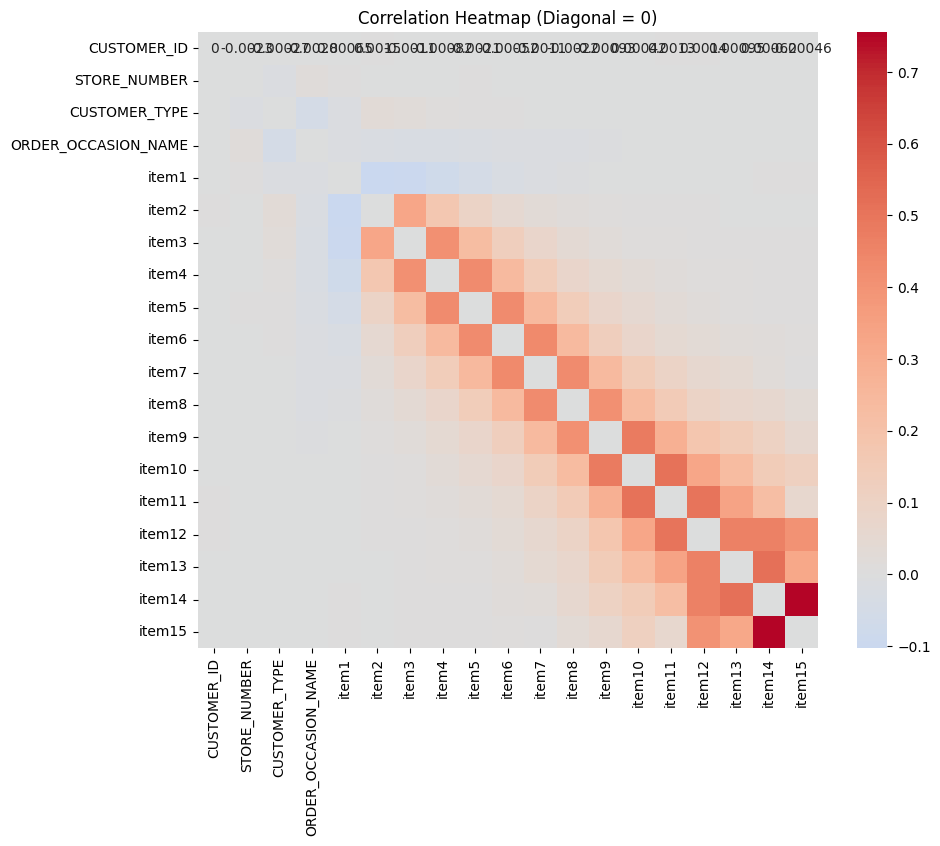

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create numerical copy for correlation
corr_data = merged_dataset_final.copy()

# Convert categorical columns to numerical using label encoding
corr_data = corr_data.apply(lambda col: col.astype('category').cat.codes 
                            if col.dtypes == 'object' else col)

# Step 2: Calculate correlation matrix
corr_matrix = corr_data.corr()

# Assume corr_matrix is already calculated
for i in range(19):  # 19 columns
    corr_matrix.iat[i, i] = 0.0

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Diagonal = 0)")
plt.show()

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create numerical copy for correlation
corr_data = merged_dataset_final.copy()

# Convert categorical columns to numerical using label encoding
corr_data = corr_data.apply(lambda col: col.astype('category').cat.codes 
                            if col.dtypes == 'object' else col)

# Step 2: Calculate correlation matrix
corr_matrix = corr_data.corr()

# --- Output correlation matrix separately ---
print("Correlation Matrix:")
display(corr_matrix)

Correlation Matrix:


,CUSTOMER_ID,STORE_NUMBER,CUSTOMER_TYPE,ORDER_OCCASION_NAME,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15
CUSTOMER_ID,1.000000,-0.002314,-0.000274,-0.002824,0.000653,0.001542,-0.001113,-0.000815,-0.002053,-0.000522,-0.001117,-0.002168,-0.000933,0.000417,0.001307,0.001400,0.000953,0.000618,-0.000463
STORE_NUMBER,-0.002314,1.000000,-0.010289,0.015483,0.004483,-0.003802,-0.000815,0.001052,0.001125,-0.000817,0.000329,-0.001775,-0.001620,-0.001134,-0.000848,-0.000227,0.000376,-0.000526,-0.000674
CUSTOMER_TYPE,-0.000274,-0.010289,1.000000,-0.049283,-0.010192,0.025274,0.021553,0.014422,0.007401,0.002571,-0.001571,-0.000096,-0.001058,-0.001352,-0.000789,-0.002192,-0.001664,-0.000104,-0.000938
ORDER_OCCASION_NAME,-0.002824,0.015483,-0.049283,1.000000,-0.009456,-0.018062,-0.025979,-0.023139,-0.019508,-0.014751,-0.011571,-0.009408,-0.006744,-0.005154,-0.002842,-0.001754,0.000348,-0.000392,-0.001242
item1,0.000653,0.004483,-0.010192,-0.009456,1.000000,-0.102796,-0.099227,-0.071329,-0.046906,-0.028539,-0.015158,-0.007346,-0.002542,-0.001805,-0.000754,0.000153,0.000235,0.001221,0.001813
item2,0.001542,-0.003802,0.025274,-0.018062,-0.102796,1.000000,0.328210,0.174999,0.094651,0.051999,0.028704,0.016656,0.008374,0.005670,0.001914,0.001252,0.000580,0.000944,0.000801
item3,-0.001113,-0.000815,0.021553,-0.025979,-0.099227,0.328210,1.000000,0.407471,0.226543,0.126365,0.073174,0.039106,0.022281,0.012934,0.008351,0.004734,0.004319,0.002688,0.001777
item4,-0.000815,0.001052,0.014422,-0.023139,-0.071329,0.174999,0.407471,1.000000,0.424093,0.237871,0.136103,0.074841,0.042894,0.026209,0.016474,0.010601,0.008116,0.005116,0.004181
item5,-0.002053,0.001125,0.007401,-0.019508,-0.046906,0.094651,0.226543,0.424093,1.000000,0.425255,0.243032,0.135943,0.071636,0.048475,0.030061,0.016010,0.011434,0.006898,0.003120
item6,-0.000522,-0.000817,0.002571,-0.014751,-0.028539,0.051999,0.126365,0.237871,0.425255,1.000000,0.433535,0.239430,0.129377,0.072621,0.044292,0.031676,0.021283,0.014774,0.009519


In [98]:
merged_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410251 entries, 0 to 1410250
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   CUSTOMER_ID          1410251 non-null  int64 
 1   STORE_NUMBER         1410251 non-null  int64 
 2   CUSTOMER_TYPE        1410251 non-null  object
 3   ORDER_OCCASION_NAME  1410251 non-null  object
 4   item1                1410251 non-null  object
 5   item2                811982 non-null   object
 6   item3                372298 non-null   object
 7   item4                142776 non-null   object
 8   item5                49542 non-null    object
 9   item6                16104 non-null    object
 10  item7                5119 non-null     object
 11  item8                1604 non-null     object
 12  item9                507 non-null      object
 13  item10               185 non-null      object
 14  item11               73 non-null       object
 15  item12         

In [99]:
#pip install mlxtend

In [101]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
from tqdm import tqdm
import random
import numpy as np
from itertools import combinations

tqdm.pandas()

# ----------------
# Prepare items column if not already
if 'items' not in merged_dataset_final.columns:
    item_cols = [f"item{i}" for i in range(1, 16)]
    merged_dataset_final['items'] = merged_dataset_final[item_cols].progress_apply(
        lambda x: [i for i in x if pd.notnull(i)],
        axis=1
    )

# Shuffle and split
merged_dataset_final = merged_dataset_final.sample(frac=1, random_state=42).reset_index(drop=True)
train_split, val_split = 0.7, 0.15
n = len(merged_dataset_final)
train_df = merged_dataset_final.iloc[:int(train_split*n)]
val_df = merged_dataset_final.iloc[int(train_split*n):int((train_split+val_split)*n)]
test_df = merged_dataset_final.iloc[int((train_split+val_split)*n):]

print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

# Transaction encoding on train
print("\nEncoding transactions...")
te = TransactionEncoder()
te_ary = list(tqdm(te.fit(train_df['items']).transform(train_df['items']),
                   total=len(train_df),
                   desc="Transaction Encoding"))
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

# Run FP-Growth
print("\nRunning FP-Growth...")
frequent_itemsets = fpgrowth(basket_df, min_support=0.001, use_colnames=True)
print(f"Found {len(frequent_itemsets)} frequent itemsets")

# Generate association rules
print("\nGenerating association rules...")
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = rules.sort_values(by='confidence', ascending=False)
print(f"Generated {len(rules)} association rules")

# Prediction function
def suggest_next_items(selected_items, rules, top_n=3):
    selected_items = set(selected_items)
    all_suggestions = {}

    for _, rule in rules.iterrows():
        if rule['antecedents'].issubset(selected_items):
            for consequent in rule['consequents']:
                if consequent not in selected_items:
                    all_suggestions[consequent] = max(all_suggestions.get(consequent, 0), rule['confidence'])

    sorted_suggestions = sorted(all_suggestions.items(), key=lambda item: item[1], reverse=True)
    return [item[0] for item in sorted_suggestions][:top_n]

# Sample validation suggestions for all 3-item combinations
sample_order = random.choice(val_df['items'].tolist())
if len(sample_order) >= 3:
    print("\nValidation suggestions for all possible 3-item combinations from the sample order:")
    for combo in tqdm(list(combinations(sample_order, 3)), desc="Generating sample predictions"):
        given_items = set(combo)
        suggestions = suggest_next_items(given_items, rules, top_n=3)
        print(f"Given items: {list(given_items)} --> Suggested next: {suggestions}")
else:
    print("Sample order had less than 3 items, skipping.")

# Evaluate on test set
print("\nEvaluating on test set...")
test_items_list = test_df['items'].tolist()

hits, cases = 0, 0
min_items_for_eval = 4  # Need at least 4 items for given 3 + actual

for items in tqdm(test_items_list, desc="Evaluating hit rate"):
    if len(items) < min_items_for_eval:
        continue
    given_items = set(items[:3])
    actual_items = set(items[3:])
    predicted_items = set(suggest_next_items(given_items, rules, top_n=3))
    if predicted_items & actual_items:
        hits += 1
    cases += 1

hit_rate = hits / cases if cases > 0 else 0
print(f"\nHit rate@3 (given 3 items): {hit_rate:.2%}")

100%|██████████| 1410251/1410251 [00:16<00:00, 85811.77it/s]


Train: 987175, Val: 211538, Test: 211538

Encoding transactions...


Transaction Encoding: 100%|██████████| 987175/987175 [00:00<00:00, 4095247.28it/s]



Running FP-Growth...
Found 343 frequent itemsets

Generating association rules...
Generated 620 association rules

Validation suggestions for all possible 3-item combinations from the sample order:


Generating sample predictions: 100%|██████████| 10/10 [00:00<00:00, 72.98it/s]


Given items: ['Chicken Sub', 'Fried Corn'] --> Suggested next: ['Grilled Wings', 'Ranch Dip', 'Spicy Wings']
Given items: ['Ranch Dip', 'Chicken Sub', 'Fried Corn'] --> Suggested next: ['Grilled Wings', 'Spicy Wings', 'Buffalo Fries']
Given items: ['Chicken Sub', 'Fried Corn', 'Veggie Sticks Spicy'] --> Suggested next: ['Grilled Wings', 'Ranch Dip', 'Spicy Wings']
Given items: ['Ranch Dip', 'Chicken Sub', 'Fried Corn'] --> Suggested next: ['Grilled Wings', 'Spicy Wings', 'Buffalo Fries']
Given items: ['Chicken Sub', 'Fried Corn', 'Veggie Sticks Spicy'] --> Suggested next: ['Grilled Wings', 'Ranch Dip', 'Spicy Wings']
Given items: ['Ranch Dip', 'Fried Corn', 'Veggie Sticks Spicy'] --> Suggested next: ['Grilled Wings', 'Spicy Wings', 'Buffalo Fries']
Given items: ['Ranch Dip', 'Chicken Sub'] --> Suggested next: ['Grilled Wings', 'Spicy Wings', 'Crispy Strips']
Given items: ['Chicken Sub', 'Veggie Sticks Spicy'] --> Suggested next: ['Grilled Wings', 'Ranch Dip', 'Spicy Wings']
Given items

Evaluating hit rate: 100%|██████████| 211538/211538 [04:58<00:00, 708.54it/s] 


Hit rate@3 (given 3 items): 62.00%
